## *Analysis Task*
*  To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

*   - Import data into Python environment.
*   - Provide the trend chart for the number of complaints at monthly and daily granularity levels.
*   - Provide a table with the frequency of complaint types.

*   - Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
*   - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
*   - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

*   - Which state has the maximum complaints
*   - Which state has the highest percentage of unresolved complaints
*   - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [34]:
#Import data into Python environment.
import pandas as pd
import numpy as np
import matplotlib as plt

In [35]:
tel = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [36]:
tel

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [37]:
# Now checking there is any missing value
tel.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [38]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


* Problem in the Date colume it is object type so i can not perform any type of operation related to the data or month
* therefore i need to conver it into date colume into date time so i can perfom based on this.

In [39]:
tel['Date']=pd.to_datetime(tel['Date'])

In [40]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

*   - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [41]:
tel['month'] = tel['Date'].dt.month_name()

In [42]:
tel

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May
...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,April
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,June
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June


In [43]:
#operation based on date 1st.
#how many complain in which date
#we can't create a graph because date and complain column are not seperaed, thus we have to create a group.

dates=tel.groupby('Date').size()
dates

Date
2015-04-01    18
2015-04-02    27
2015-04-03    15
2015-04-04    12
2015-04-05     6
              ..
2015-06-26    55
2015-06-27    39
2015-06-28    27
2015-06-29    51
2015-06-30    53
Length: 91, dtype: int64

In [44]:
#Convert it into dataframe
daily=pd.DataFrame(dates)

In [45]:
daily

,0
Date,
2015-04-01,18
2015-04-02,27
2015-04-03,15
2015-04-04,12
2015-04-05,6
...,...
2015-06-26,55
2015-06-27,39
2015-06-28,27


In [46]:
daily = pd.DataFrame(dates).reset_index()

In [47]:
daily

,Date,0
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


In [48]:
#Rename the 0 column with count.
daily.rename(columns={0:'Count'}, inplace=True)

In [49]:
daily

,Date,Count
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6
...,...,...
86,2015-06-26,55
87,2015-06-27,39
88,2015-06-28,27
89,2015-06-29,51


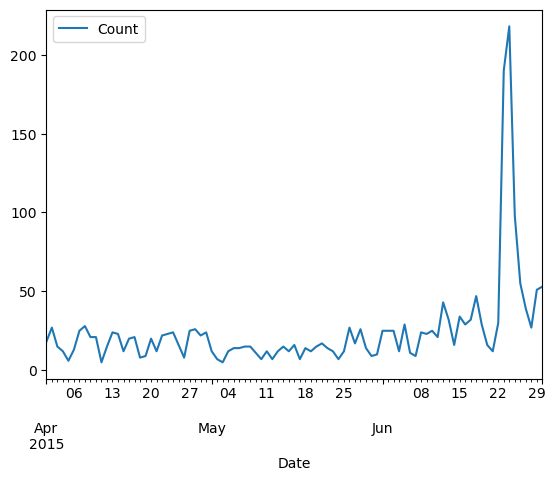

In [50]:
daily.plot(x='Date', y='Count', kind='line',);

In [51]:
daily.sort_values(['Count'], ascending=False)

,Date,Count
84,2015-06-24,218
83,2015-06-23,190
85,2015-06-25,98
86,2015-06-26,55
90,2015-06-30,53
...,...,...
46,2015-05-17,7
41,2015-05-12,7
4,2015-04-05,6
10,2015-04-11,5


In [52]:
mnth = tel.groupby('month').size()

In [55]:
mnth=pd.DataFrame(mnth).reset_index()

In [56]:
mnth

,month,0
0,April,545
1,June,1280
2,May,399


In [57]:
mnth.rename(columns={0:'Count'}, inplace=True)

In [58]:
mnth

,month,Count
0,April,545
1,June,1280
2,May,399


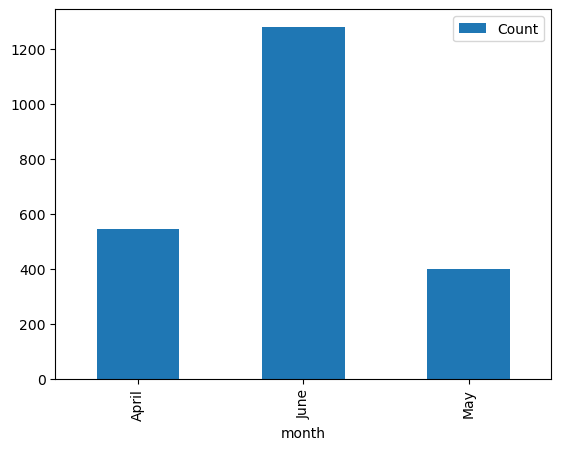

In [63]:
mnth.plot(x='month',y='Count',kind='bar',);

*   - Provide a table with the frequency of complaint types.

In [64]:
tel['Customer Complaint'].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer Complaint, Length: 1841, dtype: int64

In [65]:
tel['Customer Complaint'].str.upper().value_counts()

COMCAST                                                            102
COMCAST DATA CAP                                                    30
COMCAST INTERNET                                                    29
COMCAST DATA CAPS                                                   21
COMCAST BILLING                                                     18
                                                                  ... 
MONTHLY DATA CAPS                                                    1
COMCAST/XFINITY POOR SERVICE, FRAUDULENT BILLING AND COLLECTION      1
LOST EMAILS/BILLING                                                  1
IMPROPER BILLING AND NON RESOLUTION OF ISSUES                        1
COMCAST, YPSILANTI MI INTERNET SPEED                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [66]:
tel['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

*   - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [68]:
#new colume created new_statuse for checking complain is 'Closed', 'Open', 'Solved'or 'Pending'.
#create list comprehenson also we can use lambda function

tel['New_status']=['Open'  if x=='Open' or x=='Pending' else 'Closed'  for x in tel['Status']]

In [69]:
tel

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,New_status
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-04-02,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,April,Closed
2220,318775,Comcast Monthly Billing for Returned Modem,2015-06-02,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2221,331188,complaint about comcast,2015-06-09,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,June,Closed
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,June,Closed


*   - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [70]:
state_complain=tel.groupby(['State',"New_status"]).size()

In [71]:
state_complain

State          New_status
Alabama        Closed        17
               Open           9
Arizona        Closed        14
               Open           6
Arkansas       Closed         6
                             ..
Virginia       Open          11
Washington     Closed        75
               Open          23
West Virginia  Closed         8
               Open           3
Length: 77, dtype: int64

In [72]:
state_complain=tel.groupby(['State',"New_status"]).size().unstack()

In [73]:
state_complain

New_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


In [74]:
#For NaN value replace with o
state_complain=tel.groupby(['State',"New_status"]).size().unstack().fillna(0)

In [75]:
state_complain

New_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


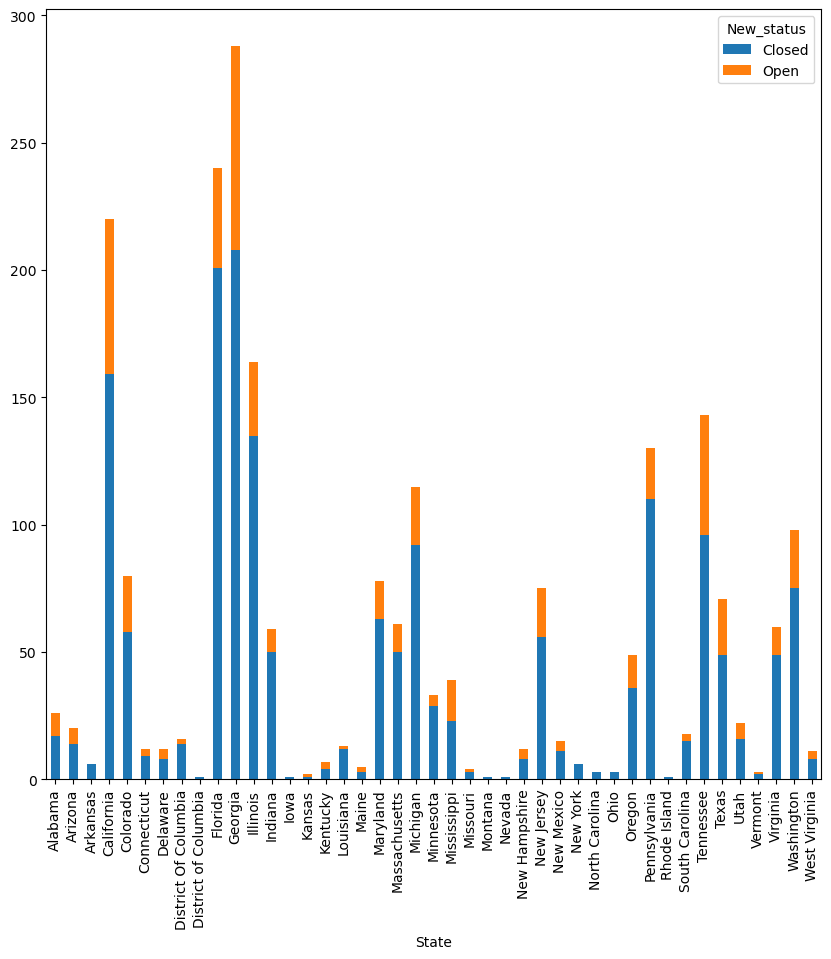

In [76]:
state_complain.plot.bar(stacked=True,figsize=(10,10));

*   - Which state has the maximum complaints

In [79]:
tel.groupby('State').size().sort_values(ascending=False)

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
Connecticut              12
New Hampshire            12
Delaware                 12
West Virginia            11
Kentucky                  7
Arkansas                  6
New York                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

In [80]:
#Top 5 state complain
tel.groupby('State').size().sort_values(ascending=False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [83]:
unresolved_data=tel.groupby(['State','New_status']).size().unstack().fillna(0).sort_values(by='Open',
                                                                                           ascending=False)

In [84]:
unresolved_data

New_status,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0
Washington,75.0,23.0
Michigan,92.0,23.0
Colorado,58.0,22.0
Texas,49.0,22.0


*   - Which state has the highest percentage of unresolved complaints

In [85]:
unresolved_data['Unresolved_cmp_percnt']=unresolved_data["Open"]/unresolved_data["Open"].sum()*100

In [86]:
unresolved_data

New_status,Closed,Open,Unresolved_cmp_percnt
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


*   - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [87]:
resolved_data=tel.groupby(['Received Via','New_status']).size().unstack()

In [88]:
resolved_data

New_status,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [89]:
resolved_data['Resolve'] = resolved_data['Closed']/resolved_data['Closed'].sum()*100

In [90]:
resolved_data['Resolve']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: Resolve, dtype: float64